In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from models.data_util import plot_data,switch_growth_rate

# 载入数据：2012-2021全球GDP报告

In [3]:
county_gdp_dataset = pd.read_csv('../data/GDP/country_gdp2012-2021.csv')

In [4]:
for i in range(2012, 2022):
    county_gdp_dataset[str(i)] = county_gdp_dataset[str(i)].apply(pd.to_numeric, errors='coerce').fillna(0.0)

In [5]:
county_gdp_dataset = county_gdp_dataset.sort_values(by=['2012'])
county_gdp_dataset_index = np.array(county_gdp_dataset.iloc[:, :2])
county_gdp_dataset_data = np.array(county_gdp_dataset.iloc[:, 2:] / 100000000)

In [6]:
county_gdp_dataset_index.T.shape
# county_gdp_dataset.iloc[:, 2:] = county_gdp_dataset.iloc[:, 2:] / 100000000

(2, 266)

In [7]:
key = county_gdp_dataset.keys()[2:].astype('int')

In [8]:
key = np.array(key)
key = key.reshape(1, 10)
x = np.array(key)
for i in range(county_gdp_dataset.shape[0] - 1):
    x = np.append(x, key, axis=0)
x = x.T

In [9]:
y = np.array(county_gdp_dataset_data)
y = y.T

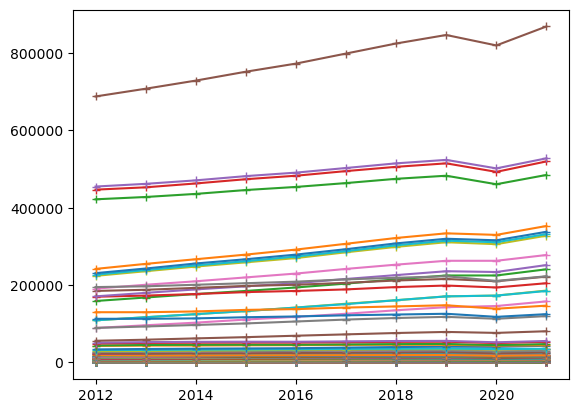

In [10]:
# key = county_gdp_dataset.keys()[2:].astype('int')
# key=np.array(key)
fig, ax = plt.subplots()
data_gdp = {
    'x': x,
    'y': y
}
# Plot the "centerline" with `plot`
ax.plot(data_gdp['x'], data_gdp['y'], marker='+')
plt.show()

# 分类数据
- 按照2012年全球GDP进行排序，从高到低
- 将GDP的量级分为四个区，进行分区展示

In [11]:
data_gdp_From0To100 = y[:, :84]
data_gdp_From100To1k = y[:, 84:161]
data_gdp_From1kTo1w = y[:, 161:214]
data_gdp_From1wTo10w = y[:, 214:265]
data_gdp = {
    'x_data_gdp_From0To100': x[:, :84],
    'x_data_gdp_From100To1k': x[:, 84:161],
    'x_data_gdp_From1kTo1w': x[:, 161:214],
    'x_data_gdp_From1wTo10w': x[:, 214:265],
    'x_global_gdp': x[:, 265],
    'data_gdp_From0To100': data_gdp_From0To100,
    'data_gdp_From100To1k': data_gdp_From100To1k,
    'data_gdp_From1kTo1w': data_gdp_From1kTo1w,
    'data_gdp_From1wTo10w': data_gdp_From1wTo10w,
    'global_gdp': y[:, 265]
}

In [ ]:
plt.figure(figsize=(24, 8))
plt.subplot(221)
plt.plot(data_gdp['x_data_gdp_From0To100'], data_gdp['data_gdp_From0To100'], marker='+')
plt.title('hundred gear')
plt.subplot(222)
plt.plot(data_gdp['x_data_gdp_From100To1k'], data_gdp['data_gdp_From100To1k'], marker='+')
plt.title('thousand gear')
plt.subplot(223)
plt.plot(data_gdp['x_data_gdp_From1kTo1w'], data_gdp['data_gdp_From1kTo1w'], marker='+')
plt.title('ten thousand gear')
plt.subplot(224)
plt.plot(data_gdp['x_data_gdp_From1wTo10w'], data_gdp['data_gdp_From1wTo10w'], marker='+')
plt.title('hundred thousand gear')
plt.suptitle('Global gdp trend')
plt.show()

In [15]:
data_gdp['global_gdp']

array([688000., 708000., 729000., 752000., 773000., 799000., 825000.,
       847000., 820000., 869000.])

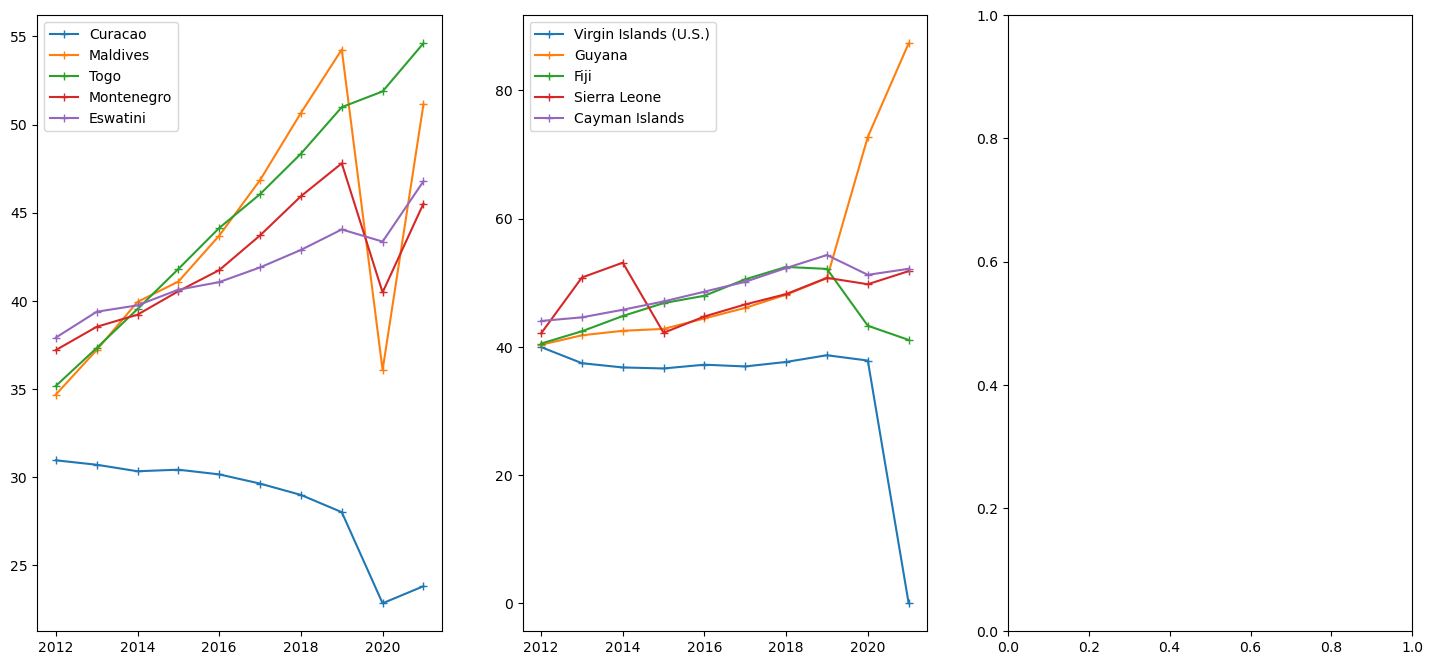

In [189]:
plot_data(x,y,50,60,label=county_gdp_dataset_index[:,0])

 # 全球GDP增长率

In [185]:
sdata_gdp_rate=switch_growth_rate(county_gdp_dataset_data.T,axis=1)

/var/folders/fg/vwbl7xrj45z_3_2x6_v2s8x80000gn/T/ipykernel_33003/3753340487.py:13: RuntimeWarning: invalid value encountered in divide
  new_data[:,i]=(data[1:,i] - data[:end,i]) / data[1:,i]
/var/folders/fg/vwbl7xrj45z_3_2x6_v2s8x80000gn/T/ipykernel_33003/3753340487.py:13: RuntimeWarning: divide by zero encountered in divide
  new_data[:,i]=(data[1:,i] - data[:end,i]) / data[1:,i]


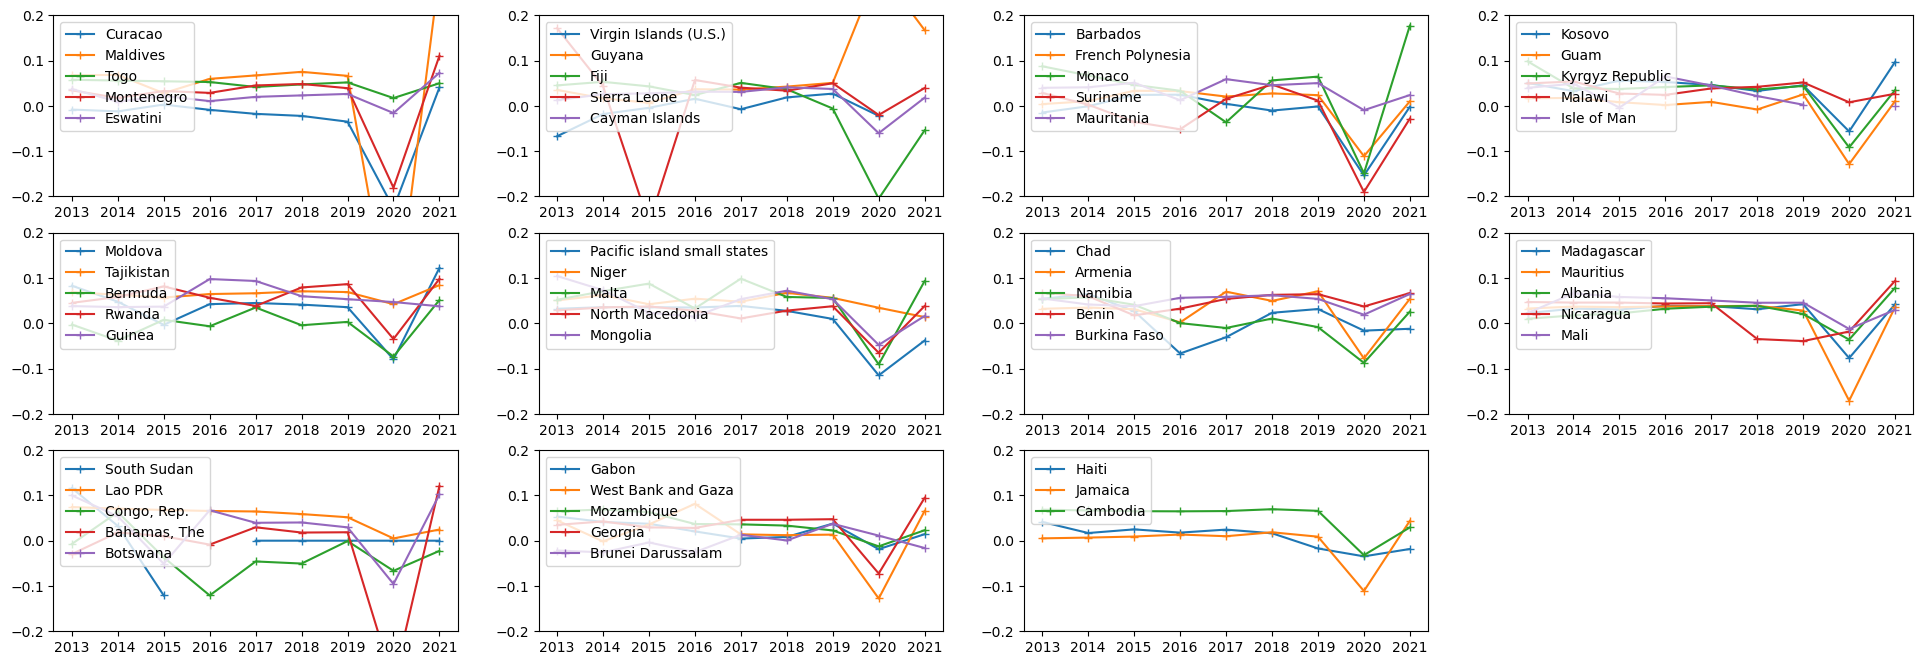

In [194]:
plot_data(x[1:,:],sdata_gdp_rate,50,103,label=county_gdp_dataset_index[:,0],ylim=[-0.2,0.2])

In [177]:
sdata_gdp_rate.T

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01324503,  0.02159827,  0.02320675, ...,  0.01747573,
        -0.04462475,  0.05192308],
       [ 0.01515152,  0.01910828,  0.02282158, ...,  0.01717557,
        -0.0438247 ,  0.04924242],
       [ 0.02824859,  0.02880658,  0.03058511, ...,  0.02597403,
        -0.03292683,  0.05638665]])

In [151]:
sdata_gdp_rate[50:60,:]

array([[-0.00811687, -0.01201362,  0.00290949, -0.00873008, -0.01732226,
        -0.02166881, -0.03371799, -0.18438472,  0.04232405],
       [ 0.07281074,  0.07329626,  0.02884549,  0.06338301,  0.0720991 ,
         0.08123129,  0.07097466, -0.33492796,  0.41745101],
       [ 0.06112343,  0.05920589,  0.05742868,  0.05559079,  0.04347748,
         0.04976213,  0.05459921,  0.01752825,  0.05260595],
       [ 0.0354898 ,  0.01783699,  0.03390381,  0.0294928 ,  0.04716465,
         0.05077889,  0.04062945, -0.15306894,  0.12434359],
       [ 0.03861214,  0.00923231,  0.02227481,  0.0106261 ,  0.02026578,
         0.02368742,  0.02703558, -0.01559643,  0.07883306],
       [-0.06285155, -0.0177453 , -0.0042508 ,  0.01600854, -0.00735294,
         0.01904762,  0.02777778, -0.02147007, -1.        ],
       [ 0.03653505,  0.01686028,  0.00687521,  0.03807919,  0.03734374,
         0.04441014,  0.05352627,  0.43479556,  0.20060011],
       [ 0.04734219,  0.05603515,  0.04501199,  0.02445652,  0